# Introduction

## Data Wrangling

In [1]:
import re 
import glob
import zipfile
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
https://www.lyft.com/bikes/bay-wheels/system-data

The Data
Each trip is anonymized and includes:

* Trip Duration (seconds)
* Start Time and Date
* End Time and Date
* Start Station ID
* Start Station Name
* Start Station Latitude
* Start Station Longitude
* End Station ID
* End Station Name
* End Station Latitude
* End Station Longitude
* Bike ID
* User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

In [2]:
with open('./data/content.html', 'r') as f:
    contents = f.read()
    soup = BeautifulSoup(contents, 'lxml')
    print(soup)

<html><head>
<!--

  Amazon S3 Bucket listing.


  Copyright (C) 2008 Francesco Pasqualini

      This program is free software: you can redistribute it and/or modify
      it under the terms of the GNU General Public License as published by
      the Free Software Foundation, either version 3 of the License, or
      (at your option) any later version.

      This program is distributed in the hope that it will be useful,
      but WITHOUT ANY WARRANTY; without even the implied warranty of
      MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
      GNU General Public License for more details.

      You should have received a copy of the GNU General Public License
      along with this program.  If not, see <http://www.gnu.org/licenses/>.

  -->
<!--

  Modified by Nolan Lawson!  (http://nolanlawson.com).  I'm keeping the spirit of the
  GPL alive by issuing this with the same license!

  -->
<title>Index of bucket "baywheels-data"</title>
<link href="//netdna.bootstrapc

In [3]:
# Make a list containing all the zip-file names
zip_list = glob.glob('./data/*.zip')
zip_list                          

['./data\\2017-fordgobike-tripdata.csv.zip',
 './data\\201801-fordgobike-tripdata.csv.zip',
 './data\\201802-fordgobike-tripdata.csv.zip',
 './data\\201803-fordgobike-tripdata.csv.zip',
 './data\\201804-fordgobike-tripdata.csv.zip',
 './data\\201805-fordgobike-tripdata.csv.zip',
 './data\\201806-fordgobike-tripdata.csv.zip',
 './data\\201807-fordgobike-tripdata.csv.zip',
 './data\\201808-fordgobike-tripdata.csv.zip',
 './data\\201809-fordgobike-tripdata.csv.zip',
 './data\\201810-fordgobike-tripdata.csv.zip',
 './data\\201811-fordgobike-tripdata.csv.zip',
 './data\\201812-fordgobike-tripdata.csv.zip',
 './data\\201901-fordgobike-tripdata.csv.zip',
 './data\\201902-fordgobike-tripdata.csv.zip',
 './data\\201903-fordgobike-tripdata.csv.zip',
 './data\\201904-fordgobike-tripdata.csv.zip',
 './data\\201905-baywheels-tripdata.csv.zip',
 './data\\201906-baywheels-tripdata.csv.zip',
 './data\\201907-baywheels-tripdata.csv.zip',
 './data\\201908-baywheels-tripdata.csv.zip',
 './data\\201909-ba

In [4]:
# Extract all zipfile using zipfile library
for zip_file in zip_list:
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall("./data/")

In [2]:
csv_list = glob.glob('./data/*.csv')
csv_list      

['./data\\2017-fordgobike-tripdata.csv',
 './data\\201801-fordgobike-tripdata.csv',
 './data\\201802-fordgobike-tripdata.csv',
 './data\\201803-fordgobike-tripdata.csv',
 './data\\201804-fordgobike-tripdata.csv',
 './data\\201805-fordgobike-tripdata.csv',
 './data\\201806-fordgobike-tripdata.csv',
 './data\\201807-fordgobike-tripdata.csv',
 './data\\201808-fordgobike-tripdata.csv',
 './data\\201809-fordgobike-tripdata.csv',
 './data\\201810-fordgobike-tripdata.csv',
 './data\\201811-fordgobike-tripdata.csv',
 './data\\201812-fordgobike-tripdata.csv',
 './data\\201901-fordgobike-tripdata.csv',
 './data\\201902-fordgobike-tripdata.csv',
 './data\\201903-fordgobike-tripdata.csv',
 './data\\201904-fordgobike-tripdata.csv',
 './data\\201905-baywheels-tripdata.csv',
 './data\\201906-baywheels-tripdata.csv',
 './data\\201907-baywheels-tripdata.csv',
 './data\\201908-baywheels-tripdata.csv',
 './data\\201909-baywheels-tripdata.csv',
 './data\\201910-baywheels-tripdata.csv',
 './data\\201911-ba

# Data Assesment

### 2017 Dataframe

In [3]:
df_2017 = pd.read_csv('./data/2017-fordgobike-tripdata.csv')
df_2017

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber
...,...,...,...,...,...,...,...,...,...,...,...,...,...
519695,435,2017-06-28 10:00:54.5280,2017-06-28 10:08:10.4380,81,Berry St at 4th St,37.775880,-122.393170,45,5th St at Howard St,37.781752,-122.405127,400,Subscriber
519696,431,2017-06-28 09:56:39.6310,2017-06-28 10:03:51.0900,66,3rd St at Townsend St,37.778742,-122.392741,321,5th at Folsom,37.780146,-122.403071,316,Subscriber
519697,424,2017-06-28 09:47:36.3470,2017-06-28 09:54:41.1870,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,48,2nd St at S Park St,37.782411,-122.392706,240,Subscriber
519698,366,2017-06-28 09:47:41.6640,2017-06-28 09:53:47.7150,58,Market St at 10th St,37.776619,-122.417385,59,S Van Ness Ave at Market St,37.774814,-122.418954,669,Subscriber


In [4]:
# Check column dtype for each column
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [5]:
# Check null value for each column
df_2017.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

In [6]:
# Check duplicated row
df_2017.duplicated().sum()

0

## Data Assesment Result

### Quality

#### 2017 Dataframe
* `start_time` and `end_time` columns in object dtype
* `start_station_id` and `end_station_id` columns in int64 dtype
* `start_station_latitude`, `start_station_longitude`, `end_station_latitude`, and `end_station_longitude` columns in float64 dtype
* `bike_id` column in int64 dtype
* `user_type` in object dtype


# Data Cleaning

The programmatic data cleaning process:

* Define
* Code
* Test

### 2017 Dataframes

What we will do for this dataframe is change columns dtype properly based on it's value.  
As always, we need to copy our dataframe before do any cleaning process, so we can refer back to the old ones.

In [7]:
df_2017_clean = df_2017.copy()

In [8]:
# Define: Change columns dtype based on it's value

# Code
dtype= {'start_time': 'datetime64', 
        'end_time': 'datetime64',
        
        'start_station_id': 'object',
        'end_station_id': 'object',
        
        'start_station_latitude': 'object',
        'start_station_longitude':  'object',
        'end_station_latitude':  'object',
        'end_station_longitude':  'object',
        
        'bike_id': 'object',
        'user_type': 'category'}

df_2017_clean = df_2017_clean.astype(dtype)

# Test
df_2017_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  object        
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  object        
 6   start_station_longitude  519700 non-null  object        
 7   end_station_id           519700 non-null  object        
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  object        
 10  end_station_longitude    519700 non-null  object        
 11  bike_id                  519700 non-null  object        
 12  user_type       

# Exploratory Data Analysis

In [95]:
df_2017_clean.describe()

,duration_sec
count,519700.000000
mean,1099.009521
std,3444.146451
min,61.000000
25%,382.000000
50%,596.000000
75%,938.000000
max,86369.000000


In [96]:
df_2017_clean.groupby('user_type').describe()

duration_sec                                                 \
                  count         mean          std   min    25%     50%   
user_type                                                                
Customer       110470.0  2557.445786  6355.311637  61.0  667.0  1086.0   
Subscriber     409230.0   705.310490  1852.582653  61.0  350.0   529.0   

                             
               75%      max  
user_type                    
Customer    1754.0  86369.0  
Subscriber   782.0  86075.0

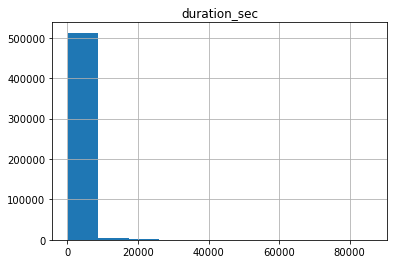

In [94]:
df_2017_clean.hist();

Since the numeric data is only at duration column, the plotted histogram just one.

# Insight

## How many user_type?

In [9]:
df_2017_clean.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

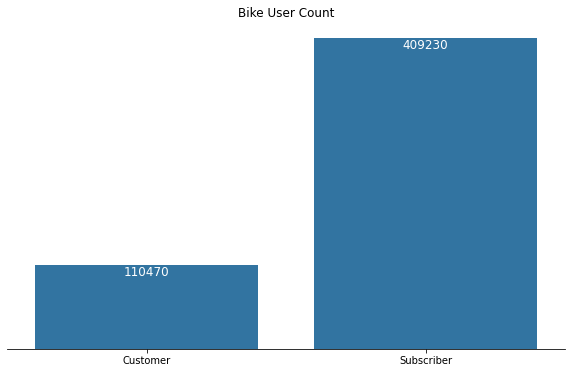

In [74]:
plt.figure(figsize=(10,6))     
base_color = sns.color_palette()[0]
ax = sns.countplot(data=df_2017_clean, x ='user_type', color=base_color)

# add annotations
n_points = df_2017_clean.shape[0]
cat_counts = df_2017_clean['user_type'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{}'.format(count)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, va='top', ha='center', color = 'w', fontsize=12)

plt.title('Bike User Count')

# Remove unnecessary features 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks([])
plt.ylabel('')
plt.xlabel('')

# Show the plot
plt.show();

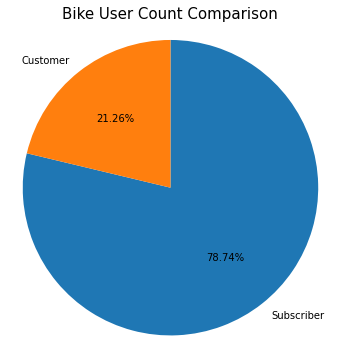

In [67]:
plt.figure(figsize=(10,6))
sorted_counts = df_2017_clean['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.2f%%');
plt.axis('square')
plt.title('Bike User Count Comparison', fontsize=15);

## How long does the average trip take?

In [12]:
# Overal trip duration average
df_2017_clean.duration_sec.mean()

1099.0095208774294

In [13]:
# Make filter based on user type
cust =  df_2017_clean['user_type']=='Customer'
subs =  df_2017_clean['user_type']=='Subscriber'

In [14]:
# Average trip duration for Customer/Casual
df_2017_clean[cust].duration_sec.mean()

2557.4457861862948

In [15]:
# Average trip duration for Subscriber/Member
df_2017_clean[subs].duration_sec.mean()

705.3104904332527

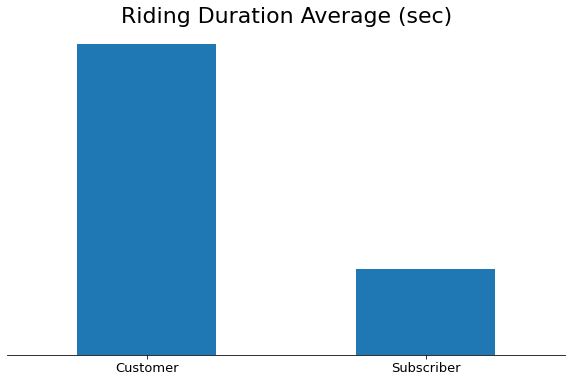

In [79]:
df_2017_duration_user = df_2017_clean[['user_type', 'duration_sec']].groupby('user_type').mean()

ax = df_2017_duration_user.plot(kind='bar', figsize=(10,6), color=base_color, fontsize=13);

locs, labels = plt.xticks()

# # loop through each pair of locations and labels
# for loc, label in zip(locs, labels):

#     # get the text property for the label to get the correct count
#     count = cat_counts[label.get_text()]
#     pct_string = '{}'.format(count)

#     # print the annotation just below the top of the bar
#     plt.text(loc, count-8, pct_string, va='top', ha='center', color = 'w')

ax.set_title("Riding Duration Average (sec)", fontsize=22)
ax.set_ylabel("second(s)", fontsize=15)
plt.xticks(rotation=0)

# Remove unnecessary features 
ax.get_legend().remove() 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks([])
plt.ylabel('')
plt.xlabel('')

# Show the plot
plt.show();

# Does the above depend on if a user is a subscriber or customer?

# Datetime analysis


In [86]:
df_2017_clean.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_day
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.7764,-122.426,43,San Francisco Public Library (Grove St at Hyde...,37.7788,-122.416,96,Customer,2017-12-31 16:57:39.654


In [98]:
df_2017_clean['start_day'] = df_2017_clean['start_time'].dt.day_name()
df_2017_clean['end_day'] = df_2017_clean['end_time'].dt.day_name()
df_2017_clean['month'] = df_2017_clean['end_time'].dt.month_name()
df_2017_clean

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_day,end_day,month
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.7764,-122.426,43,San Francisco Public Library (Grove St at Hyde...,37.7788,-122.416,96,Customer,Sunday,Monday,January
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.7849,-122.401,96,Dolores St at 15th St,37.7662,-122.427,88,Customer,Sunday,Monday,January
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.8703,-122.268,245,Downtown Berkeley BART,37.8703,-122.268,1094,Customer,Sunday,Monday,January
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.7745,-122.409,5,Powell St BART Station (Market St at 5th St),37.7839,-122.408,2831,Customer,Sunday,Monday,January
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.8688,-122.259,247,Fulton St at Bancroft Way,37.8678,-122.266,3167,Subscriber,Sunday,Monday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519695,435,2017-06-28 10:00:54.528,2017-06-28 10:08:10.438,81,Berry St at 4th St,37.7759,-122.393,45,5th St at Howard St,37.7818,-122.405,400,Subscriber,Wednesday,Wednesday,June
519696,431,2017-06-28 09:56:39.631,2017-06-28 10:03:51.090,66,3rd St at Townsend St,37.7787,-122.393,321,5th at Folsom,37.7801,-122.403,316,Subscriber,Wednesday,Wednesday,June
519697,424,2017-06-28 09:47:36.347,2017-06-28 09:54:41.187,21,Montgomery St BART Station (Market St at 2nd St),37.7896,-122.401,48,2nd St at S Park St,37.7824,-122.393,240,Subscriber,Wednesday,Wednesday,June
519698,366,2017-06-28 09:47:41.664,2017-06-28 09:53:47.715,58,Market St at 10th St,37.7766,-122.417,59,S Van Ness Ave at Market St,37.7748,-122.419,669,Subscriber,Wednesday,Wednesday,June


# Stations Analysis

station name or id, location, start vs end, distance

# Bike Analysis
ID bike

---